### <center> 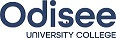

## <center> **Opgaven Programming Fundamentals**
### <center> **Prof. Bachelor ELO-ICT - Academiejaar 2023 - 2024**
### <center> 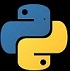
    

# <center> Les 11: OO in Python


### Oefening 1

Schrijf een klasse _Pizza_ in Python.

* Voorzie een constructormethode **\_\_init\_\_** waarin je 2 instantie-attributen klaarzet. Eentje om de _size_ van de pizza te kunnen bijhouden en eentje met de naam _toppings_. Het _toppings_ dataveld zal een lijst bijhouden met alle extra's die op je pizza wil. Vb:

```
napoli_medium = Pizza('medium',['anjovis','kappertjes', 'olijven'])
hawai_large = Pizza('large',['ananas','gekookte ham'])
```

* Voorzie een **\_\_str\_\_** methode op volgende manier:

```
print(napoli_medium')
>> Een medium pizza met anjovis en kappertjes en olijven

print(hawai_large)
>> Een large pizza met ananas en gekookte ham
```

* Voorzie een methode om 2 pizza's samen te stellen tot 1. Hiertoe kan je de **\_\_add\_\_** methode schrijven. Neem als size de grootste van de 2, en als toppinglijst de unie van de 2 toppinglijsten. Vb:

```
combinatie = napoli_medium + hawai_large
print(combinatie)
>> Een large pizza met anjovis en kappertjes en olijven en ananas en gekookte ham
```

* Voorzie ook een **\_\_len\_\_** methode. Deze telt het aantal toppings van de pizza.
```
len(combined)
>> 5
```

* Voorzie een methode **_is\_aanwezig_** om na te gaan welke toppings uit een lijst van toppings aanwezig is in je pizza object. Geef een lijst van bool's terug.

```
combined.is_aanwezig(["peperoni","ananas","champignons"])
>> [False, True, False]
```





In [1]:
class Pizza:
    sizes = {"small" : 0, "medium" : 1, "large" : 2}
    def __init__(self, size, toppings):
        self.size = size
        self.toppings = toppings
    
    def __str__(self):
        toppings_string = ""
        for i in self.toppings:
            toppings_string += i +" en " 

        return f"Een {self.size} pizza met {toppings_string[:-3]}"
    
    def __add__(pizza1, pizza2):
        size = max(pizza1.sizes[pizza1.size], pizza2.sizes[pizza2.size])
        for i, j in pizza1.sizes.items():
            size = i if j == size else size
        
        toppings = pizza1.toppings + pizza2.toppings
        return Pizza(size, toppings)

    def __len__(self):
        return len(self.toppings)

    def is_aanwezig(self, toppings_aanwezig):
        aanwezig = []
        for topping in toppings_aanwezig:
            aanwezig.append(topping in self.toppings)
        return aanwezig

napoli_medium = Pizza('medium',['anjovis','kappertjes', 'olijven'])
hawai_large = Pizza('large',['ananas','gekookte ham'])

print(napoli_medium)
print(hawai_large)

combinatie = napoli_medium + hawai_large
print(combinatie)
print(napoli_medium)

print(len(combinatie))

combinatie.is_aanwezig(["peperoni","ananas","champignons"])

Een medium pizza met anjovis en kappertjes en olijven 
Een large pizza met ananas en gekookte ham 
Een large pizza met anjovis en kappertjes en olijven en ananas en gekookte ham 
Een medium pizza met anjovis en kappertjes en olijven 
5


[False, True, False]

### Oefening 2

1. Maak een klasse Dobbelsteen aan. Deze houdt volgende datavelden bij:
  - een constante voor het minimum aantal ogen dat je kan werpen (d.i. 1 voor een klassieke dobbelsteen)
  - een constante voor het maximum aantal ogen dat je kan werpen (d.i. 6 voor een klassieke dobbelsteen)
  - een instantie variabele _worp_, die het aantal ogen van de laatste worp bijhoudt.

  Voorzie ook volgende methoden in je klasse Dobbelsteen :

  - een constructormethode die de dobbelsteen initialiseert via 2 optionele parameters, het minimum aantal ogen en het maximaal aantal ogen. De default waarden zijn respektievelijk 1 en 6. Wanneer de opgegeven minimumwaarde groter blijkt te zijn dan de opgegeven maximum waarde, gebruik dan ook de default waarden.
  - een methode gooi die het werpen met de dobbelsteen simuleert. Deze methode heeft geen parameters maar genereert telkens wanneer ze opgeroepen wordt een nieuwe waarde voor de dobbelsteen. Deze waarde wordt toegekend aan je dataveld _worp_ dat het aantal ogen van de laatste worp bijhoudt.
  - een methode _get_, deze geeft het aantal ogen terug dat bij de laatste oproep van de methode gooi geworpen werd. Wanneer er nog niet geworpen werd, geef je het minimum aantal ogen terug.
  - een methode \_\_str\_\_ die het resultaat van de methode _get_ als string teruggeeft


2. Schrijf een functie _tel\_aantal\_worpen()_ die het aantal worpen telt die nodig zijn om een vooraf ingegeven aantal ogen te werpen. Gebruik in je functie een object van type Dobbelsteen. Zorg ervoor dat het maximum van je dobbelsteen het gewenst aantal ogen maal 2 is, kies als minimum de waarde 0.  Maak gebruik van de methoden van de klasse Dobbelsteen.  Je functie geeft het aantal pogingen dat nodig was terug als resultaat, tenzij een maximum aantal worpen overschreden werd, in dat geval geef je -1 terug. Geef zowel dit maximum aantal worpen als het gewenst aantal ogen mee als argumenten van je functie.

3. Test je functie als volgt:

```
gewenst = 4
max_worpen = 10
aantal = tel_aantal_worpen(max_worpen,gewenst)
print(f'In {aantal} pogingen werd een {gewenst} gegooid' if aantal > 0
      else f'Er werd geen {gewenst} gegooid binnen de {max_worpen} beschikbare pogingen')

>>
6
3
2
8
2
4
In 6 pogingen werd een 4 gegooid
```



In [160]:
import random

class Dobbelsteen:

    

    def __init__(self, min = 1, max = 6):
        if max > min:
            self.MIN_OGEN = 1
            self.MAX_OGEN = 6
        else:
            self.MIN_OGEN = min
            self.MAX_OGEN = max
        self.worp = min
    
    def __str__(self):
        return str(self.get())

    def gooi(self):
        self.worp = random.randint(self.MIN_OGEN, self.MAX_OGEN)

    def get(self):
        return self.worp

def tel_aantal_worpen(max_worpen, gewenst):
    dobbelsteen = Dobbelsteen(0, gewenst*2)

    aantal = 0
    while dobbelsteen.get() != gewenst:
        dobbelsteen.gooi()
        print(dobbelsteen)
        if aantal >= max_worpen:
            aantal = -1
            break
        
        aantal += 1

    return aantal


gewenst = 4
max_worpen = 10
aantal = tel_aantal_worpen(max_worpen,gewenst)
print(f'In {aantal} pogingen werd een {gewenst} gegooid' if aantal > 0
    else f'Er werd geen {gewenst} gegooid binnen de {max_worpen} beschikbare pogingen')

1
1
2
1
3
4
In 6 pogingen werd een 4 gegooid


### Oefening 3

Schrijf een klasse Rechthoek om rechthoeken te kunnen voorstellen als een apart type in Python.

De data waarmee een rechthoek in het vlak volledig gedefinieerd is, is de volgende :
- de (x,y) coördinaaten van de linker bovenhoek
- een breedte
- een lengte

Definieer deze data dan ook als 3 datavelden van de klasse Rechthoek.
Voeg vervolgens een constructor methode toe aan je klasse Rechthoek zodat je rechtreeks rechthoekobjecten kan aanmaken door alle gegevens mee te geven als parameter van de constructor. Zorg ervoor dat je ook default rechthoeken kan aanmaken, dat is een rechthoek met linker bovenhoek in de oorsprong $(0,0)$ en een breedte en lengte van $1$.

Voeg dan volgende methoden toe aan de klasse Rechthoek :

- een methode **_is\_vierkant_** om na te gaan of de rechthoek ook een vierkant is. Laat deze methode als resultaat een boolean teruggeven.
- een methode **_bereken\_omtrek_** die de omtrek van de rechthoek berekent en deze als resultaat teruggeeft.
- een methode **_bereken\_opp_** die de oppervlakte van de rechthoek berekent en deze als resultaat teruggeeft.
- een methode **_is\_in_** die een tuple als input neemt met hierin de coördinaten van een punt en nagaat of deze coordinaten zich in de rechthoek bevinden (beschouw de randen van de rechthoek ook als ok). Geef een boolean terug als return waarde van deze methode.
- een methode **\_\_str\_\_** die de 4 coordinaten van de rechthoek in een string teruggeeft

Om deze nieuwe klasse te testen, maak je een object van type Rechthoek aan. Kies zelf de data waarmee je de constructor aanroept. Print nu enkele gegevens van je rechthoek uit : is het een vierkant?  Wat is de omtrek / oppervlakte van de het rechthoekobject?  Vraag vervolgens de gebruiker de coördinaten van een punt (x en y waarden) in te geven en ga dan na of dit punt zich in je rechthoekobject bevindt.

In [172]:
class Rechthoek:


    def __init__(self, coordinaten = (0,0), breedte = 1, lengte = 1):
        self.coordinaten = coordinaten
        self.breedte = breedte
        self.lengte = lengte
    
    def is_vierkant(self):
        return self.breedte == self.lengte
    
    def bereken_omtrek(self):
        omtrek = (self.breedte * 2) + (self.lengte * 2)
        return omtrek
    
    def bereken_opp(self):
        opp = self.breedte * self.lengte
        return opp

    def is_in(self, coordinaten_punt):
        x = self.coordinaten[0] <= coordinaten_punt[0] <= (self.coordinaten[0] + self.breedte)
        y = self.coordinaten[1] <= coordinaten_punt[1] <= (self.coordinaten[1] + self.lengte)
        return x and y

    def __str__(self):
        punten = [self.coordinaten, (self.coordinaten[0] + self.breedte, self.coordinaten[1]), (self.coordinaten[0] ,self.coordinaten[1] + self.lengte), (self.coordinaten[0] + self.breedte, self.coordinaten[1] + self.lengte)]
        string = ""
        for i in range(4):
            string += f"{punten[i]}; "
        return string
    

recht = Rechthoek()
print(recht.is_vierkant())
print(recht.is_in((0,1)))
print(recht.bereken_omtrek())
print(recht.bereken_opp())

print(recht)

True
True
4
1
(0, 0); (1, 0); (0, 1); (1, 1); 


### Oefening 4

Schrijf een klasse _CijferSpel_. In dit spel moest een gebruiker een code van 5 cijfers raden. Wanneer de gebruiker een gok doet, antwoordt het programma met volgende gegevens : het aantal cijfers in de gok die op de juiste positie staan alsook de som van die cijfers.

Als dataveld bevat de klasse een tuple met hierin de geheime code bestaande uit 5 positieve getallen. Voorzie ook volgende methoden:

- een constructormethode waarbij je ofwel een code kan meegeven als parameter ofwel zal de code in de constructor zelf gegenereerd worden.
- een methode **_tel\_juiste\_positie()_** die telt hoeveel cijfers van een gok op de juiste positie staan. Geef de gok mee als argument en als resultaat geef je een aantal terug. Een correcte gok is een tuple zijn met hierin 5 getallen.
- een methode **_tel\_som\_juiste\_positie_** om de som te berekenen van de cijfers die op de juiste positie staan van een gok. Geef ook hier de gok mee als parameter van de methode en als resultaat geef je nu de som terug.
- een methode **_juiste\_gok_** die nagaat of een gok exact de juiste code is. Deze methode geeft een boolean terug.
- een methode **__juiste\_input__** die nagaat of een gok wel bestaat uit 5 cijfers. Deze methode neemt een tuple als input en geeft een boolean terug.
- een methode **\_\_str\_\_** die de geheime code in stringversie teruggeeft.


Schrijf vervolgens je testcode:
 - Maak een object aan van het type _CijferSpel_ en instantieer dit met de geheime code 53840.
 - Laat de gebruiker een vast aantal keer een gok wagen. Gebruik de methodes van de klasse _CijferSpel_ om de gok van een gebruiker te beoordelen.
 - Herhaal deze test met een tweede object van type CijferSpel. Laat deze keer de code gegenereerd worden.

```
Spel1:
Waag je gok, geef 5 cijfers, je hebt nog 3 poging(en): 51111
Je gok was: (5, 1, 1, 1, 1)
Nog niet helemaal juist!
	Je hebt 1 cijfers juist geraden.
	De som van de juist geraden cijfers is: 5.
Waag je gok, geef 5 cijfers, je hebt nog 2 poging(en): 51110
Je gok was: (5, 1, 1, 1, 0)
Nog niet helemaal juist!
	Je hebt 2 cijfers juist geraden.
	De som van de juist geraden cijfers is: 5.
Waag je gok, geef 5 cijfers, je hebt nog 1 poging(en): 53840
Je gok was: (5, 3, 8, 4, 0)
Proficiat! Je hebt de code gekraakt in 3 beurten.

Spel2:
Waag je gok, geef 5 cijfers, je hebt nog 3 poging(en): 22222
Je gok was: (2, 2, 2, 2, 2)
Nog niet helemaal juist!
	Je hebt 0 cijfers juist geraden.
	De som van de juist geraden cijfers is: 0.
Waag je gok, geef 5 cijfers, je hebt nog 2 poging(en): 33333
Je gok was: (3, 3, 3, 3, 3)
Nog niet helemaal juist!
	Je hebt 1 cijfers juist geraden.
	De som van de juist geraden cijfers is: 3.
Waag je gok, geef 5 cijfers, je hebt nog 1 poging(en): 44344
Je gok was: (4, 4, 3, 4, 4)
Jammer, de beurten zijn op. De correcte code was (1, 3, 2, 0, 9)
```

In [226]:
class CijferSpel:
    def __init__(self, code = None):
        if code == None:
            code = (random.randint(0,9) for i in range(5))
        self.code = tuple(map(int, [*code]))

    def tel_juiste_positie(self, gok):
        aantal_juiste = 0
        for i in range(len(gok)):
            aantal_juiste += gok[i] == self.code[i]
        return aantal_juiste
    
    def tel_som_juiste_positie(self, gok):
        som_juiste = 0
        for i in range(len(gok)):
            som_juiste += gok[i] if gok[i] == self.code[i] else 0
        return som_juiste
    
    def juiste_gok(self, gok):
        aantal_juiste = 0
        for i in range(len(gok)):
            aantal_juiste += gok[i] == self.code[i]
        return aantal_juiste == len(self.code)
    
    def juiste_input(self, gok):
        return len(gok) == len(self.code)
    
    def __str__(self) -> str:
        return str(self.code)
    



def speel_spel(aantal_beurten, code = None):
    spel = CijferSpel(code)
    for i in range(aantal_beurten):
        gok = input(f"Waag je gok, geef 5 cijfers, je hebt nog {aantal_beurten - i} poging(en): ")
        
        
        if spel.juiste_input(gok):
            gok_tuple = tuple(map(int, [*gok]))
            print(f"je gok was {gok_tuple}")
            if spel.juiste_gok(gok_tuple):
                print(f"Goed geraden! Je hebt de code gekraakt in {i+1} beurten!")
            else:
                print("Nog niet helemaal juist!")
                print(f"Je hebt {spel.tel_juiste_positie(gok_tuple)} cijfers juist geraden.")
                print(f"De som van de juist geraden cijfers is: {spel.tel_som_juiste_positie(gok_tuple)}.")
        else:
            print("dit was geen toegestaande gok, probeer opnieuw.")
            i -= 1



#speel_spel(3, "53840")
speel_spel(3)


je gok was (3, 6, 8, 0, 4)
Nog niet helemaal juist!
Je hebt 1 cijfers juist geraden.
De som van de juist geraden cijfers is: 0.
je gok was (4, 8, 9, 2, 0)
Nog niet helemaal juist!
Je hebt 1 cijfers juist geraden.
De som van de juist geraden cijfers is: 9.
je gok was (4, 7, 9, 0, 2)
Nog niet helemaal juist!
Je hebt 2 cijfers juist geraden.
De som van de juist geraden cijfers is: 9.


### Oefening 5

- Schrijf een klasse _Teller_ met een constructor methode die 1 optioneel instantie dataveld initialiseert met de naam _data_. Als default data kies je een lege lijst. Voeg ook een methode  _plus_ toe met 1 argument die je nog geen gedrag geeft maar de tekst "Nog niet geïmplementeerd" laat uitprinten.

- Schrijf een subklasse _LijstTeller_ van de klasse _Teller_. Hierin zal je de _plus_ methode overschrijven zodat deze een lijst kan plakken aan het dataveld van je object.

- Schrijf een subklasse _DictTeller_ van de klasse _Teller_. Hierin zal je de _plus_ methode overschrijven zodat deze een dictionary kan samenvoegen met het dataveld van je object.

- Voeg nu een \_\_add\_\_ methode toe, die intern de meest geschikte _plus_ methode zal oproepen. Waar ga je deze precies schrijven?

- Demonstreer de werking van je klassen door enkele objecten ervan aan te maken en de _plus_ methode en de koppeling met de _+_ operator hierop toont.

- Is je optelling commutatief? Los dit op door ook de **\_\_radd\_\_** methode te implmenteren



In [3]:
class Teller:

    def __init__(self, data = []) -> None:
        self.data = data
    
    def plus(self, other) -> None:
        return "nog niet geimplementeerd"

    def __add__(self, other):
        return self.plus(other)

    def __radd__(self, other):
        return self.plus(other)

class LijstTeller(Teller):
    
    def plus(self, other):
        self.data += other
        return self.data

class DictTeller(Teller):
    
    def plus(self, dictonary):
        self.data.update(dictonary)
        return self.data

a = Teller([1, 2])
b = [3, 4]
print(a + b)

a = LijstTeller([1, 2])
b = [3, 4]

print(a + b)

a = DictTeller({1:"a", 2:"b"})
b = {3:"c", 4:"d"}

print(a + b)

print()

a = Teller([1, 2])
b = [3, 4]
print(b + a)

a = LijstTeller([1, 2])
b = [3, 4]

print(b + a)

a = DictTeller({1:"a", 2:"b"})
b = {3:"c", 4:"d"}

print(b + a)

nog niet geimplementeerd
[1, 2, 3, 4]
{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

nog niet geimplementeerd
[1, 2, 3, 4]
{1: 'a', 2: 'b', 3: 'c', 4: 'd'}


### Oefening 6

1. Schrijf een nieuwe klasse _Bus_ om voertuigen van dit type te kunnen voorstellen. Alle objecten van dit type zullen standaard de kleur "wit" krijgen. Verder heeft elke bus ook specifieke kenmerken zoals merk, aantal gereden kilometers en aantal zitplaatsen. Maak je klasse aan zodat deze data erin opgenomen is.
Elke bus heeft een jaarlijks onderhoudstarief of kost die afhankelijk is van het aantal beschikbare zitplaatsen in de bus. Standaard tarief is het aantal zitplaatsen x 1000. Schrijf een methode die dit tarief voor een bus object berekent.
Voorzie ook een **\_\_str\_\_** methode die alle data van je bus beschrijft in stringvorm.

2. Maak een specifieker type om schoolbussen aan te maken. Elke schoolbus heeft standaard de kleur "geel". Verder bevat een schoolbus alle data elementen van een standaard bus. Het onderhoustarief is echter iets goedkoper omdat de gemeente het onderhoud mee financiert. Het onderhoud van een schoolbus is 15% goedkoper dan dat van een standaard bus. De printout versie van een schoolbus is gelijkaardig aan deze van een standaard bus. Vermeld wel extra dat het hier over een schoolbus gaat.
```
stadsbus = Bus("Van hool",125000,60)
schoolbus = SchoolBus("Volvo", 18000, 25)
print("Het tarief voor de bus bedraagt: ", stadsbus.bereken_tarief())
print("Het tarief voor de schoolbus bedraagt: ", schoolbus.bereken_tarief())
>>
Deze bus is van het merk Van hool, heeft 125000 op de teller staan en heeft een capaciteit van 60 personen. De kleur van de bus is wit.
Deze bus is van het merk Volvo, heeft 18000 op de teller staan en heeft een capaciteit van 25 personen. De kleur van de bus is geel. Deze bus is een schoolbus.
Het tarief voor de bus bedraagt:  6000
Het tarief voor de schoolbus bedraagt:  2125.0

```


In [4]:
class Bus:
    
    def __init__(self, merk, aantal_gereden_km, aantal_zitplaatsen, kleur = "wit", tarief = 1000) -> None:
        self.merk = merk
        self.aantal_km = aantal_gereden_km
        self.aantal_zitplaatsen = aantal_zitplaatsen
        self.kleur = kleur

    
    def bereken_tarief(self):
        return self.aantal_zitplaatsen * 1000
    
    def __str__(self) -> str:
        return f"Deze bus is van het merk {self.merk}, heeft {self.aantal_km} op de teller staan en heeft een capaciteit van {self.aantal_zitplaatsen} personen. De kleur van de bus is {self.kleur}."

class SchoolBus(Bus):
    kleur = "geel"

    def bereken_tarief(self):

        return self.aantal_zitplaatsen * (1000 - ((1000 * 15) / 100))

stadsbus = Bus("Van hool",125000,60)
schoolbus = SchoolBus("Volvo", 18000, 25)
print(stadsbus)
print(schoolbus)
print("Het tarief voor de bus bedraagt: ", stadsbus.bereken_tarief())
print("Het tarief voor de schoolbus bedraagt: ", schoolbus.bereken_tarief())


Deze bus is van het merk Van hool, heeft 125000 op de teller staan en heeft een capaciteit van 60 personen. De kleur van de bus is wit.
Deze bus is van het merk Volvo, heeft 18000 op de teller staan en heeft een capaciteit van 25 personen. De kleur van de bus is wit.
Het tarief voor de bus bedraagt:  60000
Het tarief voor de schoolbus bedraagt:  21250.0


### Oefening 7

Voor een fastfood restaurant schrijf je volgende 3 klassen: een klasse _DriveIn_ een klasse _Menu_ en een klasse _Klant_

- De klasse _Menu_ houdt een intern dataveld bij van type dict. Deze dictionary bevat het aanbod van het restaurant met als keys de namen van de gerechten die besteld kunnen worden en als value de bijbehorende prijs. Deze klasse bevat naast de constructormethode nog volgende methoden:
  - methode _get()_: deze neemt een string als argument en geeft de bijbehorende prijs terug als deze string een gerecht uit het menu blijkt te zijn
  - methode _get\_all()_: deze geeft een lijst met alle mogelijke gerechten uit het menu terug
  - methode \_\_str\_\_: deze print de inhoud van het menu uit, dit zijn de gerechten en hun bijbehorende prijs.
  - methode \_\_len\_\_: de lengte van een menu is het aantal gerechten dat erin opgenomen zijn.

- De klasse _DriveIn_ heeft als intern dataveld een object van de klasse Menu. Naast de constructor heeft deze klasse ook volgende methode
  - methode _neem\_bestelling_: deze methode neemt een object van type Klant als input. De klant zal gevraagd worden wat hij uit het beschikbare menu wil bestellen. De klant zal een bestelling terugsturen. Een bestelling is een tuple van tuples met telkens een opsomming van het gekozen gerecht en het aantal stuks dat hiervan besteld zal worden zoals bvb: (('hamburger', 1), ('sla', 2), ('wrap', 1)). Op basis van de bestelling van de klant wordt een totale prijs berekend. Deze wordt opnieuw aan de klant teruggegeven.

- De klasse _Klant_ heeft een naam als intern dataveld. Naast een constructormethode, implementeer je hier nog volgende 2 methoden:
  - methode _plaats\_bestelling_: deze ontvangt een object van type Menu en zal op basis hiervan een random bestelling plaatsen als volgt: er wordt eerst een random getal gegenereerd dat kleiner is dan het totaal aantal gerechten op het menu. Dit getal stelt het aantal keer voor dat een random gerecht gekozen zal worden uit het menu. Voor elk random gekozen gerecht uit het menu wordt nog een getal gegenereerd, namelijk het aantal stuks dat van dit gerecht besteld zal worden. Deze bestelling wordt opgenomen als een tuple van tuples zoals in: (('hamburger', 1), ('sla', 2), ('wrap', 1)). Merk op, het zou kunnen dat je dubbels genereert, maar zorg ervoor dat een gerecht slechts 1 keer voorkomt in je tuples, neem gewoon de som van de aantallen in dat geval. Deze gegenereerde tuple van tuples wordt als resultaat teruggegeven.
  - methode _ontvang\_bestelling_: deze ontvangt de prijs die moet betaald worden en plaatst een gepaste boodschap op het scherm.


Wanneer de klant een boodschap naar het scherm print, vermeldt deze hierbij zijn naam. Volgend voorbeeld illustreert hoe de communicatie tussen de driveIn en een klant kan gebeuren. Plaats deze printouts telkens op een logische plaats in je code:

```
Wat zou je willen bestellen?
Dit is ons menu: {'hamburger': 3, 'frietjes': 4, 'wraps': 2, 'sla': 5}.
Dave: Dit is mijn bestelling: (('hamburger', 4), ('wraps', 5))
Bij deze je bestelling. De totale prijs van je bestelling is: 22.0. Laat het smaken!
Dave: Alstublieft 22.0 € en bedankt!

```




In [13]:
import random
class Menu:

    def __init__(self, menu : type(dict)) -> None:
        self.menu = menu

    def get(self, gerecht):
        return self.menu[gerecht] if gerecht in self.menu.keys() else False
    
    def get_all(self):
        return list(self.menu.keys())
    
    def __str__(self) -> str:
        return f"Wat zou je bij ons willen bestellen? \n Dit is ons menu: {self.menu}"
    
    def __len__(self):
        return len(self.menu.keys())




class Klant:
    def __init__(self, naam) -> None:
        self.naam = naam

    def plaats_bestelling(self, menu : type(Menu)) -> tuple:
        aantal_gerechten = random.randint(1,len(menu))
        
        bestelling = {}
        


        while aantal_gerechten :
            gerecht = random.choice(menu.get_all())
            aantal = random.randint(1,5)
            if gerecht not in bestelling.keys():
                bestelling[gerecht] = aantal
            else:
                bestelling[gerecht] += aantal
            aantal_gerechten -= 1
        bestelling = tuple(bestelling.items())
        print(f"{self.naam}: dit is mijn bestelling: {bestelling}")
        return bestelling

    def ontvang_bestelling(self, prijs):
        print(f"{self.naam}: Alsjeblieft, €{prijs} en bedankt!")



class DriveIn:

    def __init__(self, menu) -> None:
        self.menu = menu

    def neem_bestelling(self, klant: type(Klant)):
        print(menu)
        bestelling = klant.plaats_bestelling(self.menu)
        prijs_bestelling = 0
        for gerecht_naam, gerecht_aantal in bestelling:

            if gerecht_naam in self.menu.get_all():
                prijs_bestelling += self.menu.get(gerecht_naam) + gerecht_aantal

        print(f"bij deze je bestelling, dat is €{prijs_bestelling} alstublieft")
        klant.ontvang_bestelling(prijs_bestelling) 

klant = Klant("bart")
menu = Menu({"burger": 4, "nuggets" : 8, "frietjes" : 3})
mcdo = DriveIn(menu)

mcdo.neem_bestelling(klant)


Wat zou je bij ons willen bestellen? 
 Dit is ons menu: {'burger': 4, 'nuggets': 8, 'frietjes': 3}
bart: dit is mijn bestelling: (('frietjes', 7), ('burger', 4))
bij deze je bestelling, dat is €18 alstublieft
bart: Alsjeblieft, €18 en bedankt!
